## Importación modulos y dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("../conchillas_listo.csv", sep=",", low_memory=False)

In [4]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,RatioE,RatioT,RatioA
0,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,3.295238,1.310642,1.360331
1,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,3.403141,1.312697,1.091379
2,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,3.494253,1.370011,1.324607
3,99,22,6.50,1.94,12.81,9.80,7.60,5.68,5.26,LU,3.350515,1.307143,1.338028
4,99,23,5.42,1.50,12.17,8.80,7.17,5.57,5.14,LU,3.613333,1.382955,1.287253


In [5]:
data.dtypes

Lote           int64
Individuo      int64
AE           float64
LE           float64
AT           float64
LT           float64
AA           float64
LA           float64
NV           float64
Morfotipo     object
RatioE       float64
RatioT       float64
RatioA       float64
dtype: object

## Prueba Kmeans

### Con todas las variables iniciales

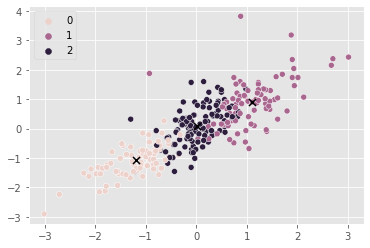

In [7]:
x = data[['AE','LE','AT','LT','AA','LA','NV']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

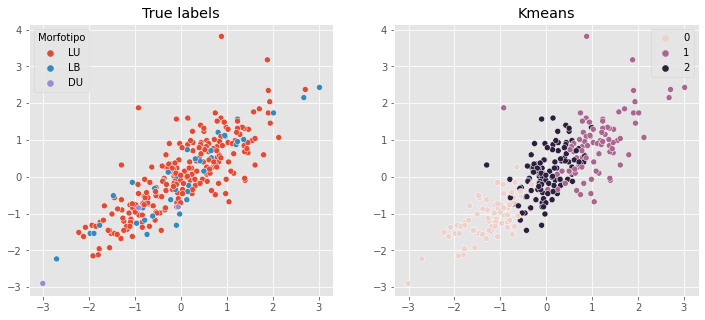

In [10]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [ ]:
#no puede comparar etiquetas de letras con etiquetas numéricas
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f",yticklabels=['Benigno','Maligno']);

#print(classification_report(y_true,labels))

### Con las nuevas variables de Ratio + NV

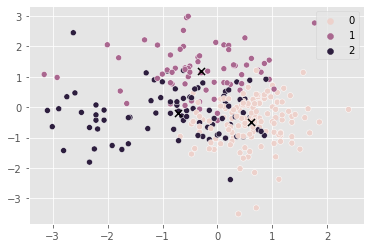

In [8]:
x_R = data[['NV','RatioE','RatioT','RatioA']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

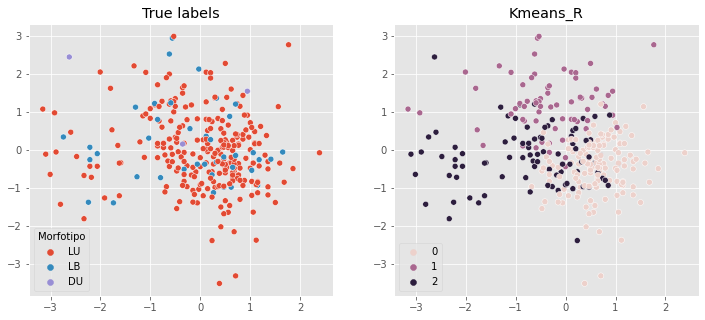

In [9]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

# Tal vez debamos arrancar con clasificación por Arboles